# Exercise Data Exploratory Analysis

In [79]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import os
import sys
import csv

from collections import defaultdict, Counter

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('whitegrid')

In [145]:
df = pd.read_csv("D:\Open Classroom\Datasets\Exercise and Fitness Metrics Dataset\exercise_dataset.csv")
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
ID                    3864 non-null int64
Exercise              3864 non-null object
Calories Burn         3864 non-null float64
Dream Weight          3864 non-null float64
Actual Weight         3864 non-null float64
Age                   3864 non-null int64
Gender                3864 non-null object
Duration              3864 non-null int64
Heart Rate            3864 non-null int64
BMI                   3864 non-null float64
Weather Conditions    3864 non-null object
Exercise Intensity    3864 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


In [147]:
df.shape

(3864, 12)

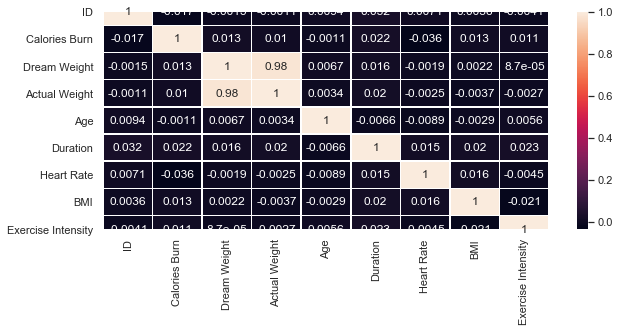

In [148]:
plt.figure(figsize=(10, 4))
sb.heatmap(df.corr(), annot=True, linewidth=0.5)

In [149]:
df.isnull().sum()

ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

In [150]:
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [151]:
df.describe().round()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.0,3864.0,3864.0,3864.0,3864.0,3864.0,3864.0,3864.0,3864.0
mean,1932.0,302.0,75.0,75.0,40.0,40.0,140.0,27.0,5.0
std,1116.0,116.0,15.0,15.0,13.0,12.0,23.0,5.0,3.0
min,1.0,100.0,50.0,46.0,18.0,20.0,100.0,19.0,1.0
25%,967.0,202.0,62.0,62.0,29.0,30.0,119.0,23.0,3.0
50%,1932.0,300.0,76.0,76.0,40.0,40.0,140.0,27.0,5.0
75%,2898.0,404.0,88.0,88.0,51.0,51.0,160.0,31.0,8.0
max,3864.0,500.0,100.0,104.0,60.0,60.0,180.0,35.0,10.0


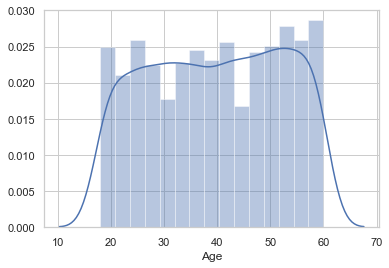

In [152]:
sb.distplot(df['Age'])

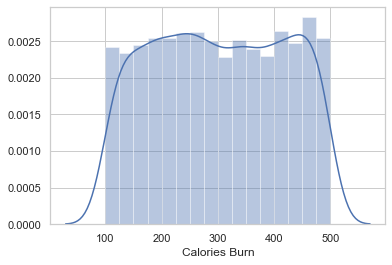

In [153]:
sb.distplot(df['Calories Burn'])

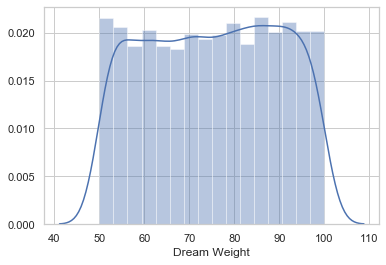

In [154]:
sb.distplot(df['Dream Weight'])

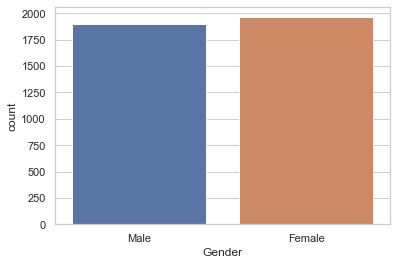

In [155]:
sb.countplot(df['Gender'])

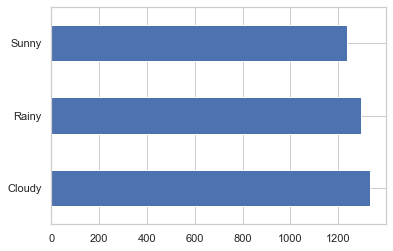

In [156]:
df['Weather Conditions'].value_counts().plot(kind='barh')

In [157]:
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [158]:
exercise = df.groupby(df['Exercise'])
exercise['Gender'].value_counts().to_frame().rename(columns={'Gender':'Participants'})

Participants
Exercise    Gender              
Exercise 1  Female           217
            Male             186
Exercise 10 Female           212
            Male             186
Exercise 2  Male             175
            Female           170
Exercise 3  Female           206
            Male             179
Exercise 4  Female           191
            Male             180
Exercise 5  Female           206
            Male             198
Exercise 6  Male             202
            Female           179
Exercise 7  Male             198
            Female           188
Exercise 8  Female           203
            Male             194
Exercise 9  Male             202
            Female           192

In [159]:
exercise['Weather Conditions'].value_counts().to_frame().rename(columns={'Weather Conditions':'Practice'})

Practice
Exercise    Weather Conditions          
Exercise 1  Cloudy                   141
            Rainy                    141
            Sunny                    121
Exercise 10 Cloudy                   136
            Rainy                    136
            Sunny                    126
Exercise 2  Cloudy                   130
            Rainy                    108
            Sunny                    107
Exercise 3  Cloudy                   135
            Rainy                    131
            Sunny                    119
Exercise 4  Cloudy                   132
            Rainy                    120
            Sunny                    119
Exercise 5  Cloudy                   148
            Rainy                    133
            Sunny                    123
Exercise 6  Sunny                    128
            Rainy                    127
            Cloudy                   126
Exercise 7  Rainy                    147
            Cloudy                   121
            Sunny                    118
Exercise 8  Sunny                    143
            Cloudy                   129
            Rainy                    125
Exercise 9  Cloudy                   134
            Sunny                    133
            Rainy                    127

In [160]:
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, r2_score, mean_squared_error

In [162]:
RFR = RandomForestRegressor()

In [163]:

le = LabelEncoder()

x = df.drop(columns = ['Exercise Intensity'])

x = x.apply(le.fit_transform)
y = df['Exercise Intensity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (3091, 11)
x test (773, 11)
y train (3091,)
y test (773,)


In [164]:
RFR.fit(x_train, y_train)

D:\Team Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [165]:
pred = RFR.predict(x_train)
x_train['target'] = pred

D:\Team Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
x_train.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,target
330,330,1,534,722,973,26,1,25,56,2293,0,6.3
2939,2939,3,361,482,489,29,0,26,34,2950,2,8.5
735,735,0,3608,2769,2374,8,1,1,28,1193,0,6.5
1551,1551,5,352,537,883,4,0,40,52,2534,2,4.6
2340,2340,0,1751,214,429,14,1,32,17,3256,1,2.7
